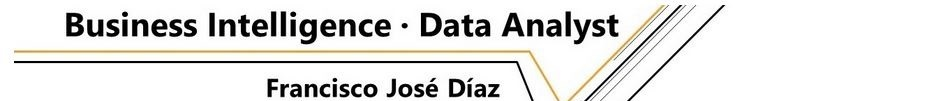

# Multiple Linear Regression para AdventureWorks2019

Desarrollo de un modelo de Regresion Lineal Multiple para la base de datos de muestra Adventure Works 2019. Esta corporacion vende bicicletas, por lo que para este caso se ha creado una consulta SQL para obtener la lista de caracteristicas y precio de los productos. Se elaboro el siguiente query en SQL: 


> SELECT 
        pp.ProductID, 
		pp.Name,
		pp.Color,
		pp.ListPrice AS Price,
		pp.Size,
		pp.Weight,
		pp.DaysToManufacture,
		pp.SellStartDate,
		sg.Name as Categoria,

>CASE
		WHEN pp.Style = 'W' THEN 'Women'
		WHEN pp.Style = 'M' THEN 'Men'
		ELSE 'Universal' 
		END AS Estilo				

>FROM [Production].[Product] AS pp

>JOIN [Production].[ProductSubcategory] AS sg ON pp.[ProductSubcategoryID] = sg.ProductSubcategoryID

>WHERE pp.Weight IS NOT NULL AND pp.Size IS NOT NULL  

El proposito de este notebook es practicar la RLM en Python. Por lo tanto se desea conocer de que manera las caracteristicas de los productos pueden ayudarnos a predecir el precio de las bicicletas que vende Adventure Works. La base se puede descargar en el siguiente link: [AdventureWorks sample databases](https://learn.microsoft.com/en-us/sql/samples/adventureworks-install-configure?view=sql-server-ver16&tabs=ssms)

## Setup

Primeramente importaremos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import scipy.stats as st 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleanproductsfeature.csv")

Conoceremos el tipo de datos de las variables del data frame 

In [3]:
df.dtypes

Unnamed: 0             int64
ProductID              int64
Name                  object
Color                 object
Price                float64
Size                   int64
Weight               float64
DaysToManufacture      int64
SellStartDate         object
Categoria             object
Estilo                object
dtype: object

In [4]:
df.head()

,Unnamed: 0,ProductID,Name,Color,Price,Size,Weight,DaysToManufacture,SellStartDate,Categoria,Estilo
0,0,771,"Mountain-100 Silver, 38",Silver,3399.99,38,20.35,4,2011-05-31,Mountain Bikes,Universal
1,1,772,"Mountain-100 Silver, 42",Silver,3399.99,42,20.77,4,2011-05-31,Mountain Bikes,Universal
2,2,773,"Mountain-100 Silver, 44",Silver,3399.99,44,21.13,4,2011-05-31,Mountain Bikes,Universal
3,3,774,"Mountain-100 Silver, 48",Silver,3399.99,48,21.42,4,2011-05-31,Mountain Bikes,Universal
4,4,775,"Mountain-100 Black, 38",Black,3374.99,38,20.35,4,2011-05-31,Mountain Bikes,Universal


<AxesSubplot:xlabel='Price', ylabel='Density'>

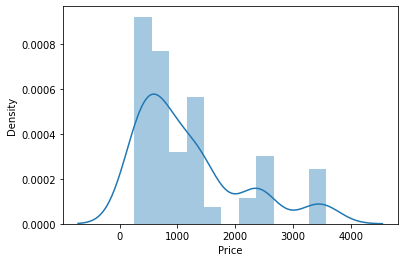

In [5]:
# Con el hitograma obsevamos la distribucion de la variable Price
sns.distplot(df['Price'])

In [6]:
# Asimetria y curtosis:

print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 1.186521
Kurtosis: 0.539984


- Se determina asimetria positiva con valores se centran a la derecha
- Distribucion es leptocurtica (curtosis levemente mayor a 0)

In [7]:
# Estadisticas del data frame 

round(df.describe(include = "all"),2)

,Unnamed: 0,ProductID,Name,Color,Price,Size,Weight,DaysToManufacture,SellStartDate,Categoria,Estilo
count,176.00,176.00,176,176,176.00,176.00,176.00,176.00,176,176,176
unique,NaN,NaN,176,5,NaN,NaN,NaN,NaN,4,6,2
top,NaN,NaN,"Mountain-100 Silver, 38",Black,NaN,NaN,NaN,NaN,2013-05-30,Road Bikes,Universal
freq,NaN,NaN,1,55,NaN,NaN,NaN,NaN,76,43,154
mean,87.50,844.44,NaN,NaN,1193.25,48.86,13.48,2.69,NaN,NaN,NaN
std,50.95,95.85,NaN,NaN,912.21,7.09,10.46,1.46,NaN,NaN,NaN
min,0.00,680.00,NaN,NaN,249.79,38.00,2.12,1.00,NaN,NaN,NaN
25%,43.75,758.75,NaN,NaN,539.99,44.00,2.80,1.00,NaN,NaN,NaN
50%,87.50,818.00,NaN,NaN,782.99,48.00,15.24,4.00,NaN,NaN,NaN
75%,131.25,946.25,NaN,NaN,1438.12,54.00,23.46,4.00,NaN,NaN,NaN


Identificamos las variables que no utilizaremos para eliminarlas con funcion .drop

In [8]:
df.columns

Index(['Unnamed: 0', 'ProductID', 'Name', 'Color', 'Price', 'Size', 'Weight',
       'DaysToManufacture', 'SellStartDate', 'Categoria', 'Estilo'],
      dtype='object')

In [9]:
df.drop("Unnamed: 0", axis = 1, inplace=True) 
df.drop("ProductID", axis = 1, inplace=True)
df.drop("SellStartDate", axis = 1, inplace=True)
df.drop("Name", axis = 1, inplace=True)
df.drop("Estilo", axis = 1, inplace=True)

## Multiple linear regression

Elaboramos la regresion lineal multiple con la libreria statsmodels

In [10]:
rlm = smf.ols('Price ~ Size + Weight+ DaysToManufacture + C(Categoria) + C(Color)', df)

model = rlm.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     89.06
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           4.66e-65
Time:                        17:03:11   Log-Likelihood:                -1270.9
No. Observations:                 176   AIC:                             2568.
Df Residuals:                     163   BIC:                             2609.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1.128e+04    750.131     15.036      0.000    9797.671    1.28e+04
C(Categoria)[T.Mountain Frames]  -1.03e+04    537.258    -19.168      0.000   -1.14e+04   -9237.500
C(Categoria)[T.Road Bikes]      -3421.1736    166.803    -20.510      0.000   -3750.547   -3091.800
C(Categoria)[T.Road Frames]     -1.052e+04    562.451    -18.713      0.000   -1.16e+04   -9414.295
C(Categoria)[T.Touring Bikes]     911.0725    197.359      4.616      0.000     521.363    1300.782
C(Categoria)[T.Touring Frames]  -1.018e+04    582.163    -17.480      0.000   -1.13e+04   -9026.686
C(Color)[T.Blue]                 -228.8628    166.367     -1.376      0.171    -557.376      99.650
C(Color)[T.Red]                    26.9822     90.237      0.299      0.765    -151.201     205.166
C(Color)[T.Silver]                 37.3371     88.823      0.420      0.675    -138.056     212.730
C(Color)[T.Yellow]               -183.0131    124.847     -1.466      0.145    -429.540      63.513
Size                               18.3807      5.181      3.548      0.001       8.151      28.610
Weight                           -426.9865     15.697    -27.201      0.000    -457.983    -395.990
DaysToManufacture                  72.6452    148.636      0.489      0.626    -220.856     366.146
==============================================================================
Omnibus:                       11.270   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.294
Skew:                           0.524   Prob(JB):                      0.00582
Kurtosis:                       2.448   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El summary indica que el 0.86 de la variacion en la variable dependiente se explica por la variable independiente. Ademas observamos una posible fuerte multicolinealidad. El Prob (F-statistic) determina que el uso de nuestras variables predictoras permite que el modelo de regresion se ajuste mejor a los datos que el modelo de solo intercepto

### Variables Dummy

In [11]:
dummy_variable_1 = pd.get_dummies(df["Categoria"])
dummy_variable_2 = pd.get_dummies(df["Color"]) 

In [12]:
# Vamos a concatenar las dummy con el df y lo almacenaremos en dumdf

dumdf = pd.concat([df, dummy_variable_1,dummy_variable_2], axis=1)
dumdf.drop("Categoria", axis = 1, inplace=True) 
dumdf.drop("Color", axis = 1, inplace=True) 


In [13]:
# Cambiar el nombre de las columnas
dumdf = dumdf.rename({'Mountain Bikes': 'MountainBikes', 'Mountain Frames': 'MountainFrames','Road Bikes': 'RoadBikes','Road Frames': 'RoadFrames','Touring Bikes': 'TouringBikes','Touring Frames': 'TouringFrames'}, axis=1)
dumdf.head()

,Price,Size,Weight,DaysToManufacture,MountainBikes,MountainFrames,RoadBikes,RoadFrames,TouringBikes,TouringFrames,Black,Blue,Red,Silver,Yellow
0,3399.99,38,20.35,4,1,0,0,0,0,0,0,0,0,1,0
1,3399.99,42,20.77,4,1,0,0,0,0,0,0,0,0,1,0
2,3399.99,44,21.13,4,1,0,0,0,0,0,0,0,0,1,0
3,3399.99,48,21.42,4,1,0,0,0,0,0,0,0,0,1,0
4,3374.99,38,20.35,4,1,0,0,0,0,0,1,0,0,0,0


### Analisis de correlacion
En esta parte se conocera la correlacion entre las variables y averiguaremos los casos de multicolinealidad

In [14]:
dumdf.corr()['Price'].sort_values() # correlación

MountainFrames      -0.246260
RoadFrames          -0.218221
TouringFrames       -0.208477
Size                -0.069610
Yellow              -0.062717
Blue                -0.046487
Black               -0.040694
Silver               0.004394
TouringBikes         0.096402
Red                  0.139332
RoadBikes            0.252669
MountainBikes        0.254002
Weight               0.311104
DaysToManufacture    0.473395
Price                1.000000
Name: Price, dtype: float64

Diagramas de dispersion de Price vs 'Size', 'Weight', 'DaysToManufacture' 

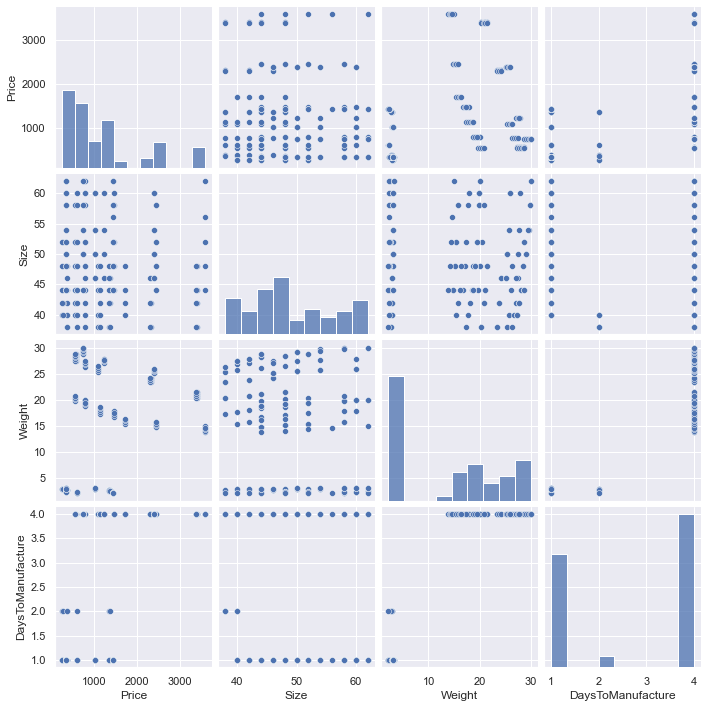

In [15]:
sns.set()
cols = ['Price', 'Size', 'Weight', 'DaysToManufacture']
sns.pairplot(dumdf[cols], size = 2.5)
plt.show();

Matriz de correlaciones a traves de un heatmap que contiene variables cuantitativas y dummys 

<AxesSubplot:>

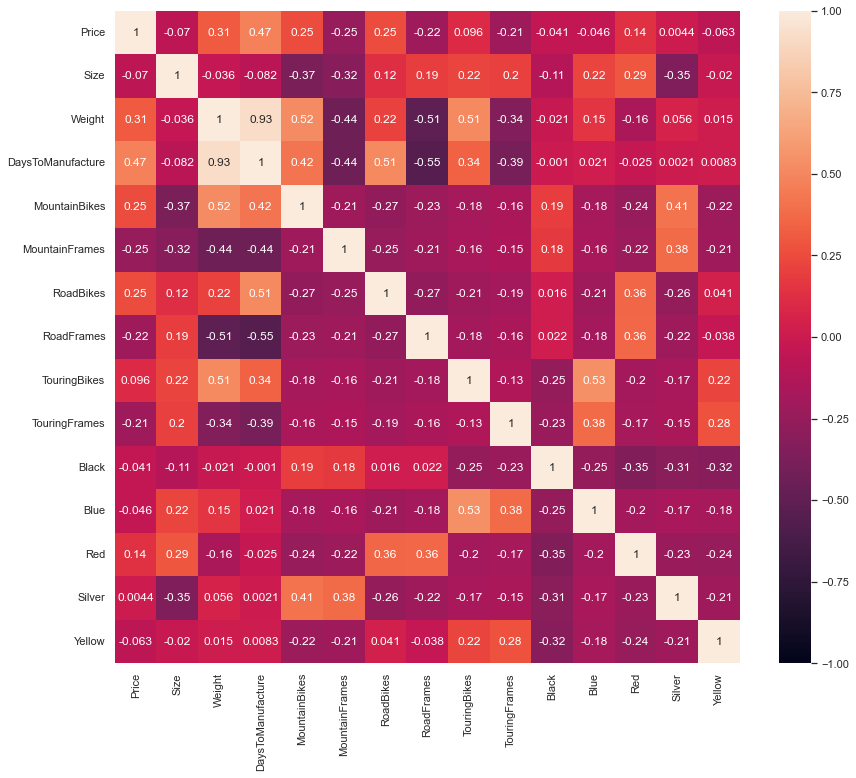

In [16]:
plt.figure(figsize=(14, 12))
sns.heatmap(dumdf.corr(), vmin = -1, vmax = +1, annot = True)

- Multicolinealidad *DaysToManufacture* y *Weight*

## Evaluacion y desicion

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Se elaborara una visualizacion para compara el valor actual de Price vs Y predictivo

In [18]:
Z = dumdf[['Size','Weight','DaysToManufacture',
  'MountainFrames', 
  'RoadBikes', 'RoadFrames',
  'TouringBikes','TouringFrames', 
   'Blue', 'Red', 'Silver', 'Yellow'
       ]]
Y = dumdf['Price'] 

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

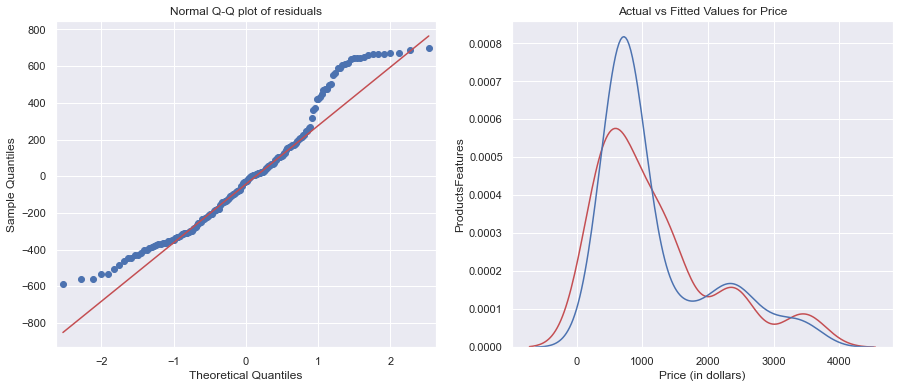

In [19]:
lm = LinearRegression()
lm.fit(Z,Y) 
Y_hat = lm.predict(Z) #creando prediction
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(15,6))

#Comparación price real vs predicción de price
distRes = sns.distplot(dumdf['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=distRes)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('ProductsFeatures')

# Test de normalidad de residuos Q-Q Plot
qqplot = sm.qqplot(model.resid,line= 'q', ax = axes[0]) 
axes[0].set_title("Normal Q-Q plot of residuals")


El grafico QQ determina que los residuos no tienen un distribucion normal y se observa los residuos con forma de curva de tipo "S". El grafico de la derecha nos indica que los valores predichos por el modelo (linea azul) no tienen un ajuste preciso con la variable objetivo Price (linea roja). 

Calculamos el MSE del modelo

In [20]:
mean_squared_error(dumdf['Price'],Y_hat)

109497.00509763337

Se determina que el modelo tiene un r uadrado de 0.86 y un error cuadratico medio de 1.09x10^5

### Validacion del modelo

Con el factor de inflacion de la varianza se averiguara la intensidad de la multicolinealidad

In [21]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price ~ Size + Weight+ DaysToManufacture + C(Categoria) + C(Color)', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,837.644721,Intercept
1,57.483835,C(Categoria)[T.Mountain Frames]
2,7.646940,C(Categoria)[T.Road Bikes]
3,71.742948,C(Categoria)[T.Road Frames]
4,6.341863,C(Categoria)[T.Touring Bikes]
5,46.321159,C(Categoria)[T.Touring Frames]
6,4.506499,C(Color)[T.Blue]
7,2.012530,C(Color)[T.Red]
8,1.660687,C(Color)[T.Silver]
9,3.451682,C(Color)[T.Yellow]


De acuerdo a la regla de VIF se interpreta que las variables Color.Blue, Color.Yellow, Color.Red y Size indican una moderada multicolinealidad, por su parte Color.Silver no tiene problemas de multicolinealidad. Las variables restantes contienen una fuerte multicolinealidad.

### Analisis de residuos
Para analizar los residuos usaremos la StatsModels. Lo aplicaremos a la variable Size.

eval_env: 1


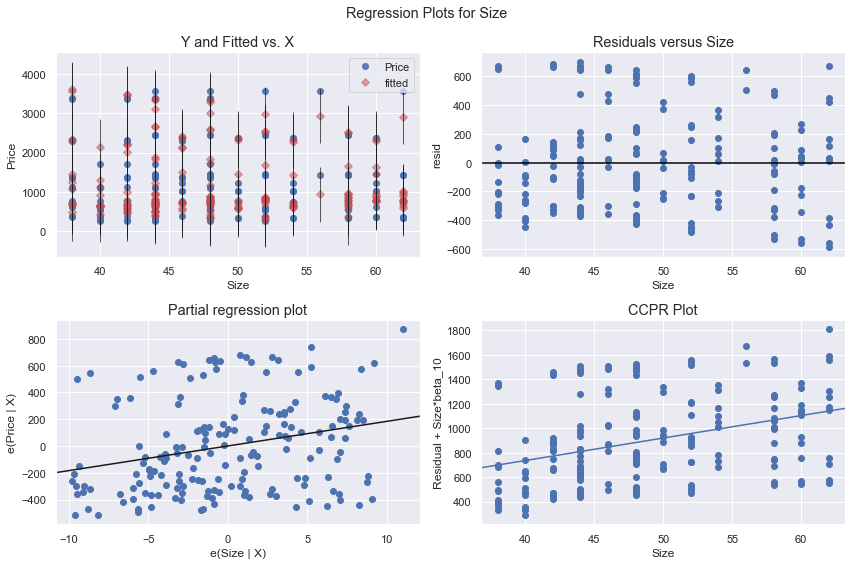

In [22]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Size', fig=fig)
